In [1]:
def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        #if not os.path.exists(filename):
        #    download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 784)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        #if not os.path.exists(filename):
        #    download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    script_dir=os.getcwd()
    rel_path="Input_data/"
    abs_path=os.path.join(script_dir,rel_path)
    X_train = load_mnist_images(abs_path+'train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels(abs_path+'train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images(abs_path+'t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels(abs_path+'t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [2]:
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
%matplotlib inline

X_train, y_train, X_val, y_val, X_test, y_test=load_dataset()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
X_train=X_train.reshape((50000,784))

rd=100

from sklearn.decomposition import PCA
PCA_in_train=X_train.reshape(50000,784)
PCA_in_val=X_val.reshape(10000,784)
PCA_in_test=X_test.reshape(10000,784)

pca=PCA(n_components=rd)
pca_train=pca.fit(PCA_in_train)

#Transforming the training, validation and test data
X_train_dr=pca.transform(PCA_in_train).reshape((50000,rd))

PCA_vectors=pca.components_

PCA_vectors.shape

PCA_vectors=np.transpose(np.array(PCA_vectors))

A=np.dot(X_train,PCA_vectors)

### The in-built PCA automatically subtracts the per-dimension mean for all axes

In [12]:
A-X_train_dr

array([[ 3.00534797,  0.10196018,  1.16647089, ..., -0.02384999,
        -0.02971324,  0.02340394],
       [ 3.00534678,  0.10196018,  1.16647077, ..., -0.02384996,
        -0.02971345,  0.02340372],
       [ 3.00534773,  0.10195971,  1.166471  , ..., -0.02385008,
        -0.0297133 ,  0.02340385],
       ..., 
       [ 3.00534725,  0.10195994,  1.16647077, ..., -0.02385001,
        -0.02971332,  0.02340382],
       [ 3.00534725,  0.10195982,  1.166471  , ..., -0.02385008,
        -0.02971318,  0.02340385],
       [ 3.00534773,  0.10195988,  1.16647065, ..., -0.02385008,
        -0.02971314,  0.0234039 ]], dtype=float32)

In [16]:
pca_proj_sum=np.sum(np.absolute(X_train_dr),axis=1)

In [19]:
np.where(X_train<0)

(array([], dtype=int64), array([], dtype=int64))

In [20]:
np.where(PCA_vectors<0)

(array([  0,   0,   0, ..., 779, 779, 779]),
 array([ 5,  7,  9, ..., 96, 97, 98]))

In [21]:
PCA_abs=np.absolute(PCA_vectors)

In [32]:
scores=np.zeros(784)
for i in range(784):
    for j in range(100):
        scores[i]=scores[i]+np.sum(X_train[:,i]*PCA_vectors[i,j])

In [33]:
scores_abs=np.zeros(784)
for i in range(784):
    for j in range(100):
        scores_abs[i]=scores_abs[i]+np.sum(X_train[:,i]*PCA_abs[i,j])

In [163]:
top_features=np.argsort(scores_abs)[::-1][:100]

In [164]:
top_features

array([211, 435, 407, 210, 408, 380, 212, 183, 406, 434, 463, 241, 436,
       213, 379, 240, 238, 237, 601, 409, 209, 462, 182, 464, 239, 381,
       184, 437, 242, 433, 603, 628, 236, 405, 629, 630, 600, 575, 492,
       602, 491, 574, 185, 520, 547, 352, 573, 465, 353, 214, 269, 548,
       519, 627, 599, 461, 490, 576, 264, 378, 181, 270, 432, 382, 208,
       410, 493, 268, 297, 572, 325, 404, 518, 546, 263, 631, 604, 657,
       354, 489, 521, 265, 438, 266, 291, 235, 549, 598, 571, 656, 319,
       460, 402, 298, 326, 377, 351, 186, 577, 374])

In [165]:
scores_abs[435]

126654.53435945511

In [166]:
zero_array=np.zeros((50000,784))

for i in range(50000):
    np.put(zero_array[i,:],top_features,1)

adv_x=X_train+1.0*zero_array

In [169]:
X_train_inc_adv=np.vstack((X_train,adv_x))

In [170]:
X_train_inc_adv.shape

(100000, 784)

In [171]:
y_train_new=np.hstack((y_train,y_train))

In [172]:
y_train_new.shape

(100000,)

In [173]:
zero_array_test=np.zeros((10000,784))

In [174]:
for i in range(10000):
    np.put(zero_array_test[i,:],top_features,1)

In [175]:
adv_x_test=X_test+1.0*zero_array_test

In [176]:
from sklearn import svm

clf=svm.LinearSVC(dual=False)

clf.fit(X_train,y_train)

X_val=X_val.reshape((10000,784))

val_out=out=clf.predict(X_val)

validation_success=(10000-np.count_nonzero(val_out-y_val))/10000.0

In [177]:
validation_success

0.9206

In [178]:
X_test=X_test.reshape((10000,784))

test_out=clf.predict(X_test)

test_success=(10000-np.count_nonzero(test_out-y_test))/10000.0

In [179]:
test_success

0.9153

In [180]:
count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
print_flag=0
for i in range(10000):
    x_ini=(X_test[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    #x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
    x_adv=adv_x_test[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_test[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
        count_pure_adv=count_pure_adv+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        print_flag=print_flag+1
print count_wrong/10000.0, count_adv/10000.0, count_pure_adv/10000.0

0.4312 0.4166 0.3673


In [181]:
count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
print_flag=0
for i in range(50000):
    x_ini=(X_train[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    #x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
    x_adv=adv_x[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_train[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv=count_pure_adv+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        print_flag=print_flag+1
print count_wrong/50000.0, count_adv/50000.0, count_pure_adv/50000.0

0.42556 0.41634 0.37172


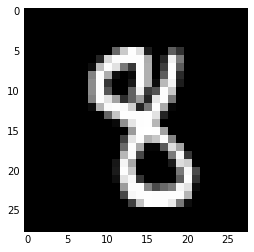

In [182]:
plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)

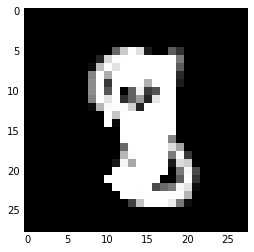

In [183]:
plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)

In [155]:
X_train_new_dr=pca.transform(X_train_inc_adv).reshape((100000,rd))
X_test_dr=pca.transform(PCA_in_test).reshape((10000,rd))
X_val_dr=pca.transform(PCA_in_val).reshape((10000,rd))
X_adv_dr_test=pca.transform(adv_x_test).reshape((10000,rd))
X_adv_dr=pca.transform(adv_x).reshape((50000,rd))

clf_pca=svm.LinearSVC(dual=False)

clf_pca.fit(X_train_dr,y_train)

val_out_pca=clf_pca.predict(X_val_dr)
validation_success_pca=(10000-np.count_nonzero(val_out_pca-y_val))/10000.0

In [156]:
validation_success_pca

0.9173

In [157]:
test_out_pca=clf_pca.predict(X_test_dr)

test_success_pca=(10000-np.count_nonzero(test_out_pca-y_test))/10000.0

In [158]:
test_success_pca

0.9124

In [159]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
#print_flag_pca=0
for i in range(10000):
    x_ini=(X_test_dr[i,:]).reshape((1,rd))
    ini_class=clf_pca.predict(x_ini)
    #x_adv=(x_ini-7.84*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[0,:])))).reshape((1,rd))
    x_adv=X_adv_dr_test[i,:].reshape((1,rd))
    final_class=clf_pca.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_test[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/10000.0, count_adv_pca/10000.0, count_pure_adv_pca/10000.0

0.2021 0.1807 0.133


In [160]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
#print_flag_pca=0
for i in range(50000):
    x_ini=(X_train_dr[i,:]).reshape((1,rd))
    ini_class=clf_pca.predict(x_ini)
    #x_adv=(x_ini-7.84*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[0,:])))).reshape((1,rd))
    x_adv=X_adv_dr[i,:].reshape((1,rd))
    final_class=clf_pca.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_train[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/50000.0, count_adv_pca/50000.0, count_pure_adv_pca/50000.0

0.21276 0.19136 0.1406
